# WeatherPy
----


##  Three observable trends

Based on the data and analysis, 

1.The further from equator either north or south, the lower the temperature.

 linear equation for   
 Northern Hemisphere: Y = -0.55X + 92.82, R-square 51.9%   
 Southern Hemisphere:  Y = 0.81X + 83.64, R-square 63.5%   
 (Y =temperature,  X=Latitude)

2.There is a weak relationship observed between Humidity and Latitude. 

 linear equation for       
 Northern Hemisphere: Y = 0.04X + 65.36,      R-square 1.2%   
 Southern Hemisphere:  Y = -0.07X + 70.37,    R-square 2.5%   
 (Y =humidity,  X=Latitude)

3.The latitude doesn’t matter for the wind speed. Very weak relationship observed.

 linear equation for    
 Northern Hemisphere: Y = -0.004X + 8.4,    R-square 0.02%   
 Southern Hemisphere:  Y = -0.02X + 7.71,   R-square 0.17%   
 (Y =wind speed,  X=Latitude)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import csv
import json
import datetime as dt


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [7]:
# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url +"&units=imperial"+"&q=" + city + "&appid=" + weather_api_key

index=range(len(cities))

#Data extract from response (json object) using FOR LOOP and add to the empty list below

city_list= []
country_list = []
lat_list=[]
lon_list=[]
humidity_list=[]
temp_list=[]
maxTemp_list=[]
windSpeed_list=[]
cloudiness_list=[]
date_list=[]

for n in index:
    try:
        print(f"Making request, number {n} for {cities[n]}")
        query_url = f"{url}&units=imperial&q={cities[n]}&appid={weather_api_key}"
        response = requests.get(query_url).json()
    
        city_list.append(response['name'])
        country_list.append(response['sys']['country'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        humidity_list.append(response['main']['humidity'])
        temp_list.append(response['main']['temp'])
        maxTemp_list.append(response['main']['temp_max']) 
        windSpeed_list.append(response['wind']['speed'])
        cloudiness_list.append(response['clouds']['all'])
        date_list.append(response['dt'])
    except KeyError:
        print(f"Oops, the city '{cities[n]}' doesn't exist")
    
time.sleep(2)

Making request, number 0 for torbay
Making request, number 1 for butaritari
Making request, number 2 for castro
Making request, number 3 for karratha
Making request, number 4 for mataura
Making request, number 5 for khatanga
Making request, number 6 for luderitz
Making request, number 7 for barentsburg
Oops, the city 'barentsburg' doesn't exist
Making request, number 8 for cape town
Making request, number 9 for hermanus
Making request, number 10 for provideniya
Making request, number 11 for tuktoyaktuk
Making request, number 12 for upernavik
Making request, number 13 for bredasdorp
Making request, number 14 for comodoro rivadavia
Making request, number 15 for amderma
Oops, the city 'amderma' doesn't exist
Making request, number 16 for puerto ayora
Making request, number 17 for hilo
Making request, number 18 for jimenez
Making request, number 19 for ushuaia
Making request, number 20 for taolanaro
Oops, the city 'taolanaro' doesn't exist
Making request, number 21 for conde
Making request

Making request, number 187 for henzada
Oops, the city 'henzada' doesn't exist
Making request, number 188 for udachnyy
Making request, number 189 for georgetown
Making request, number 190 for turiacu
Making request, number 191 for galveston
Making request, number 192 for richards bay
Making request, number 193 for fairbanks
Making request, number 194 for pochutla
Making request, number 195 for lagoa
Making request, number 196 for leshukonskoye
Making request, number 197 for kodiak
Making request, number 198 for qom
Making request, number 199 for namatanai
Making request, number 200 for constitucion
Making request, number 201 for jinchengjiang
Oops, the city 'jinchengjiang' doesn't exist
Making request, number 202 for atambua
Making request, number 203 for noumea
Making request, number 204 for ontario
Making request, number 205 for santa fe
Making request, number 206 for algiers
Making request, number 207 for lolua
Oops, the city 'lolua' doesn't exist
Making request, number 208 for pacif

Making request, number 375 for ust-kut
Making request, number 376 for ovalle
Making request, number 377 for port augusta
Making request, number 378 for yongan
Making request, number 379 for bonfim
Making request, number 380 for minna
Making request, number 381 for talavera de la reina
Making request, number 382 for eyl
Making request, number 383 for gangapur
Making request, number 384 for den helder
Making request, number 385 for bolshaya sosnova
Making request, number 386 for saryozek
Making request, number 387 for laguna
Making request, number 388 for ola
Making request, number 389 for nishihara
Making request, number 390 for katsuura
Making request, number 391 for mesquite
Making request, number 392 for inzai
Making request, number 393 for bengkulu
Making request, number 394 for chhabra
Making request, number 395 for stokmarknes
Making request, number 396 for mao
Making request, number 397 for la grande
Making request, number 398 for higuey
Oops, the city 'higuey' doesn't exist
Maki

Making request, number 571 for vilyuysk
Making request, number 572 for kendallville
Making request, number 573 for thaton
Making request, number 574 for podbelsk
Oops, the city 'podbelsk' doesn't exist
Making request, number 575 for emerald
Making request, number 576 for nicoya
Making request, number 577 for zarumilla
Making request, number 578 for sao jose da coroa grande
Making request, number 579 for kerouane
Making request, number 580 for ponta delgada
Making request, number 581 for zharkent
Making request, number 582 for pemangkat
Making request, number 583 for kupang
Making request, number 584 for kattivakkam
Making request, number 585 for kokopo
Making request, number 586 for ternate
Making request, number 587 for cockburn town
Making request, number 588 for zabolotiv
Making request, number 589 for voi
Making request, number 590 for camara de lobos
Making request, number 591 for yuxia
Making request, number 592 for camacha
Making request, number 593 for lasa
Making request, numb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_id = list(range(len(city_list)))
w_dict={"City ID":city_id, "City":city_list, "Country":country_list, "Lat":lat_list,"Lng":lon_list,
        "Humidity":humidity_list,"Temp":temp_list,"Max Temp":maxTemp_list,"Wind Speed":windSpeed_list,
        "Cloudiness":cloudiness_list,"Date":date_list}
city_data=pd.DataFrame(w_dict).set_index(['City ID'])
city_data.head()

,City,Country,Lat,Lng,Humidity,Temp,Max Temp,Wind Speed,Cloudiness,Date
City ID,,,,,,,,,,
0,Torbay,CA,47.67,-52.73,54,57.97,62.01,11.41,75,1592762715
1,Butaritari,KI,3.07,172.79,77,83.62,83.62,16.93,100,1592763072
2,Castro,BR,-24.79,-50.01,54,72.59,72.59,9.26,0,1592763072
3,Karratha,AU,-20.74,116.85,36,67.66,67.66,10.98,0,1592763072
4,Mataura,NZ,-46.19,168.86,96,31.82,31.82,1.79,48,1592762927


In [10]:
city_data.count()

City          580
Country       580
Lat           580
Lng           580
Humidity      580
Temp          580
Max Temp      580
Wind Speed    580
Cloudiness    580
Date          580
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data.describe()

,Lat,Lng,Humidity,Temp,Max Temp,Wind Speed,Cloudiness,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.995172,19.105190,67.420690,69.238741,69.809379,8.207086,45.077586,1.592763e+09
std,33.300742,86.993727,21.105515,14.524033,14.625257,5.287077,35.430867,8.275699e+01
min,-54.800000,-175.200000,3.000000,31.820000,31.820000,0.110000,0.000000,1.592763e+09
25%,-7.270000,-58.755000,56.000000,58.490000,59.000000,4.410000,12.000000,1.592763e+09
50%,27.080000,19.100000,71.000000,70.545000,71.600000,7.025000,40.000000,1.592763e+09
75%,49.620000,98.622500,83.000000,80.405000,80.600000,11.210000,76.000000,1.592763e+09
max,78.220000,179.320000,100.000000,111.070000,111.070000,29.970000,100.000000,1.592763e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
city_data.loc[city_data["Humidity"] > 100, ['City']]

,City
City ID,


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_data.drop(city_data[city_data["Humidity"] > 100].index)
clean_city_data.head()

,City,Country,Lat,Lng,Humidity,Temp,Max Temp,Wind Speed,Cloudiness,Date
City ID,,,,,,,,,,
0,Torbay,CA,47.67,-52.73,54,57.97,62.01,11.41,75,1592762715
1,Butaritari,KI,3.07,172.79,77,83.62,83.62,16.93,100,1592763072
2,Castro,BR,-24.79,-50.01,54,72.59,72.59,9.26,0,1592763072
3,Karratha,AU,-20.74,116.85,36,67.66,67.66,10.98,0,1592763072
4,Mataura,NZ,-46.19,168.86,96,31.82,31.82,1.79,48,1592762927


In [26]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
city_data.to_csv("city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [27]:
w_date=dt.date.fromtimestamp(1592491096).strftime('%Y-%m-%d')
w_date

'2020-06-18'

## Latitude vs. Temperature Plot

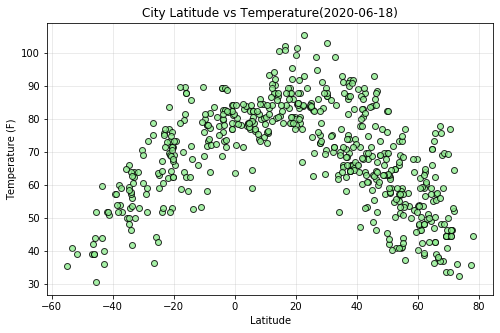

In [44]:
# scatter plot 
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],marker="o",facecolors="lightgreen",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Temperature(2020-06-18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.grid(True,alpha=0.3)
plt.savefig("Output/Lat_vs_Temp.jpg")
plt.show()



The code is poltting scatter plot to show relationship between temperature(Y-axis) and latitude (X-axis) : the further from the Equator, the lower the temperature.  

## Latitude vs. Humidity Plot

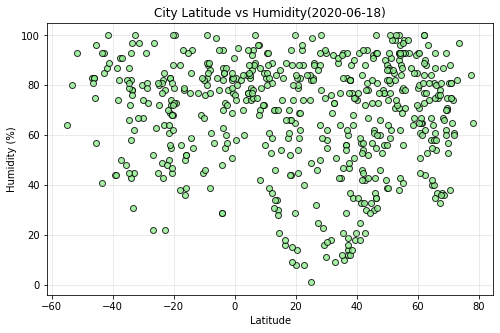

In [45]:
# scatter plot 
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],marker="o",facecolors="lightgreen",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Humidity(2020-06-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.grid(True,alpha=0.3)
plt.savefig("Output/Lat_vs_Humidity.png")
plt.show()

This code is plotting scatter plot to show relationship between Humidity(Y-axis) and latitude (X-axis). Looks weak relation between the two values.   

## Latitude vs. Cloudiness Plot

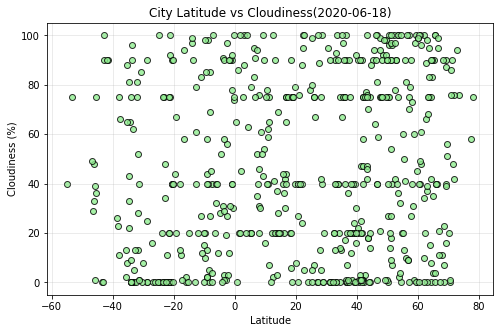

In [14]:
# scatter plot 
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],marker="o",facecolors="lightgreen",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Cloudiness(2020-06-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.grid(True,alpha=0.3)
plt.savefig("Output/Lat_vs_Cloudiness.png")
plt.show()


This code is plotting scatter plot to show relationship between Cloudiness(Y-axis) and latitude (X-axis). Weak relation observed between the two values.   

## Latitude vs. Wind Speed Plot

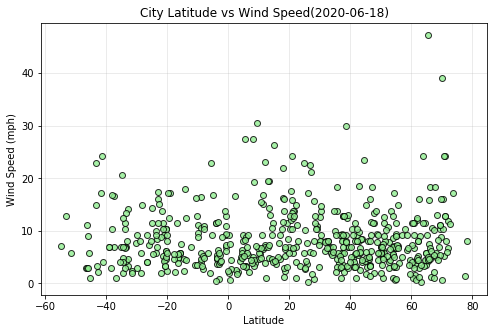

In [47]:
# scatter plot 
plt.figure(figsize=(8,5))
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],marker="o",facecolors="lightgreen",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Wind Speed(2020-06-18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.grid(True,alpha=0.3)
plt.savefig("Output/Lat_vs_Wind Speed.png")
plt.show()


This code is plotting scatter plot to show relationship between Wind Speed(Y-axis) and latitude (X-axis). Weak relation observed between the two values.     

## Linear Regression

In [48]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi = clean_city_data.loc[clean_city_data['Lat']>=0]
s_hemi = clean_city_data.loc[clean_city_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Y = -0.55X + 92.82
R-squared is : 0.5198


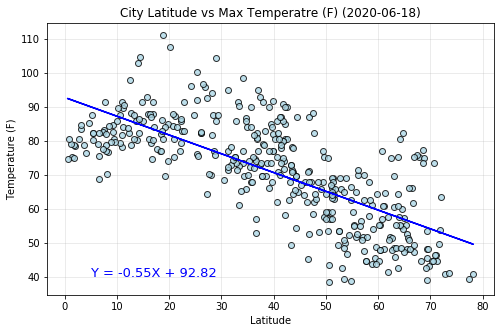

In [16]:
# Perform a linear regression on temperature vs. latitude
y_values=n_hemi['Max Temp']
x_values=n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,2)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Max Temperatre (F) (2020-06-18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (5,40), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/nH_lat_vs_maxTemp.png")
plt.show()


The linear regression is modeling the relationship between Temperature (Y-axis) and latitude (X-axis) in Northern Hemisphere. Negative relationship (slope -0.55) observed and R-square (explanatory power) is 51.9%.    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Y = 0.81X + 83.64
R-squared is : 0.6358


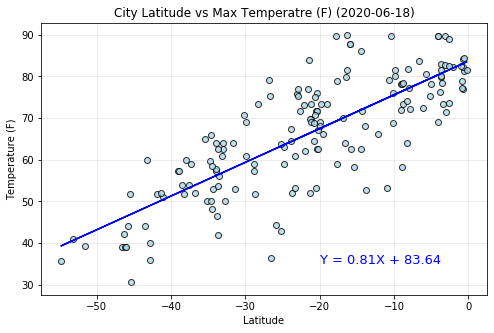

In [50]:
# Perform a linear regression on temperature vs. latitude
y_values=s_hemi['Max Temp']
x_values=s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,2)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Max Temperatre (F) (2020-06-18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (-20,35), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/sH_lat_vs_maxTemp.png")
plt.show()


The linear regression is modeling the relationship between Temperature (Y-axis) and latitude (X-axis) in Southern Hemisphere. slope +0.81 observed and R-square (explanatory power) is 63.6%. Compared to Northern Hemisphere, Southern Hemisphere has stronger relationship (absolute value of slope is closer to 1 than Northern Hemisphere)   

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Y = 0.04X + 65.36
R-squared is : 0.0012


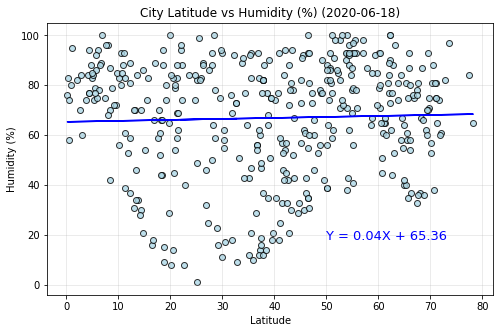

In [51]:
# Perform a linear regression on Humidity vs. latitude
y_values=n_hemi['Humidity']
x_values=n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,2)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Humidity (%) (2020-06-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (50,18), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/nH_lat_vs_Humidity.png")
plt.show()


The linear regression is modeling the relationship between Humidity (Y-axis) and latitude (X-axis) in Northern Hemisphere. Slope +0.04 (weak relationship) observed and R-square (explanatory power) is 0.12%.   

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Y = -0.07X + 70.37
R-squared is : 0.0025


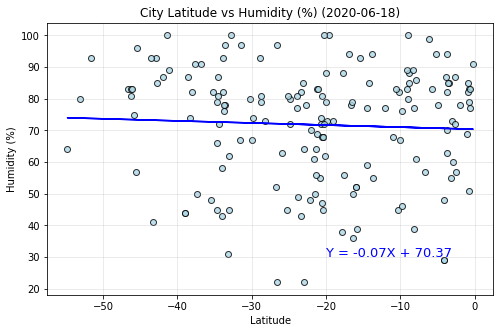

In [52]:
# Perform a linear regression on Humidity vs. latitude
y_values=s_hemi['Humidity']
x_values=s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,2)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Humidity (%) (2020-06-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (-20,30), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/sH_lat_vs_Humidity.png")
plt.show()


The linear regression is modeling the relationship between Humidity (Y-axis) and latitude (X-axis) in Southern Hemisphere. Slope -0.07 (weak relationship) observed and R-square (explanatory power) is 0.25%.   

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Y = 0.09X + 44.72
R-squared is : 0.0026


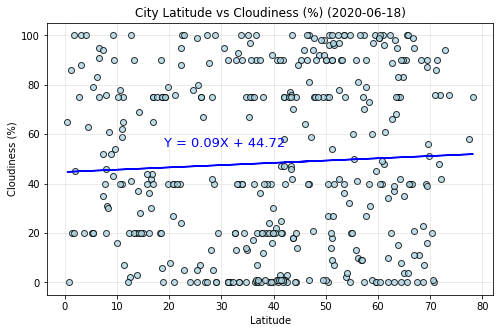

In [18]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Perform a linear regression on Humidity vs. latitude
y_values=n_hemi['Cloudiness']
x_values=n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,2)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Cloudiness (%) (2020-06-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (19,55), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/nH_lat_vs_Cloudiness.png")
plt.show()


The linear regression is modeling the relationship between Cloudiness (Y-axis) and latitude (X-axis) in Northern Hemisphere. Slope +0.09 (weak relationship) observed and R-square (explanatory power) is 2.6%.   

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Y = 0.03X + 47.51
R-squared is : 0.0001


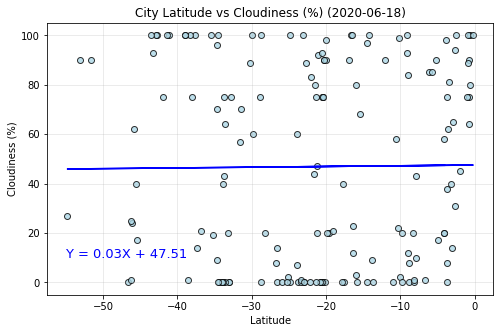

In [54]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Perform a linear regression on Humidity vs. latitude
y_values=s_hemi['Cloudiness']
x_values=s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,2)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Cloudiness (%) (2020-06-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (-55,10), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/sH_lat_vs_Cloudiness.png")
plt.show()


The linear regression is modeling the relationship between Cloudiness (Y-axis) and latitude (X-axis) in Southern Hemisphere. Slope +0.03 (weak relationship) observed and R-square (explanatory power) is 0.01%.   

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Y = -0.004X + 8.4
R-squared is : 0.0002


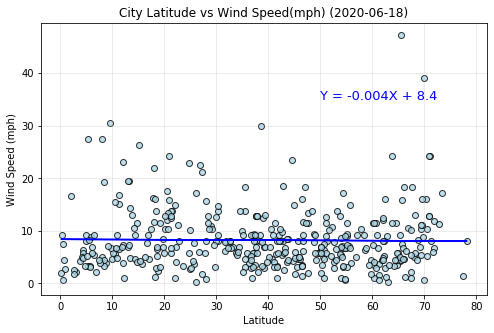

In [55]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Perform a linear regression on Humidity vs. latitude
y_values=n_hemi['Wind Speed']
x_values=n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq="Y = " + str(round(slope,3)) + "X + "+str(round(intercept,2))
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Wind Speed(mph) (2020-06-18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (50,35), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/nH_lat_vs_windSpeed.png")
plt.show()


The linear regression is modeling the relationship between Wind Speed (Y-axis) and latitude (X-axis) in Northern Hemisphere. Slope -0.004 (weak relationship) observed and R-square (explanatory power) is 0.02%.   


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Y = -0.02X + 7.71
R-squared is : 0.0017


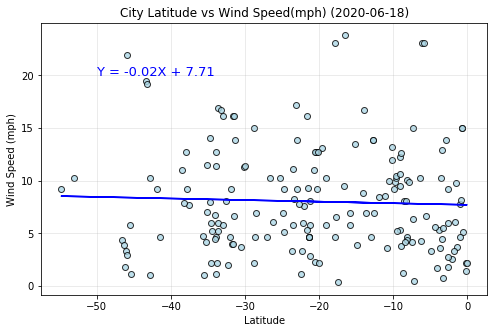

In [19]:
####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Perform a linear regression on Humidity vs. latitude
y_values=s_hemi['Wind Speed']
x_values=s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq=f"Y = {str(round(slope,2))}X + {str(round(intercept,2))}"
print(line_eq)
print(f"R-squared is : {round(rvalue**2,4)}") 

plt.figure(figsize=(8,5))
# scatter plot 
plt.scatter(x_values,y_values,marker="o",facecolors="lightblue",alpha=0.8, edgecolors="black")

#x=np.arange(-90,90,10)
plt.title("City Latitude vs Wind Speed(mph) (2020-06-18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.xticks(x)
plt.annotate(line_eq, (-50,20), fontsize=13, color='blue')
plt.grid(True,alpha=0.3)

plt.plot(x_values,regress_values,color='blue')
plt.savefig("Output/sH_lat_vs_windSpeed.png")
plt.show()


The linear regression is modeling the relationship between Wind Speed (Y-axis) and latitude (X-axis) in Southern Hemisphere. Slope -0.02 (weak relationship) observed and R-square (explanatory power) is 0.23%.   